In [1]:
from tf_agents.trajectories import time_step as ts
from tf_agents.policies import py_tf_eager_policy
import tf_agents

import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

import os
import pickle
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
from PIL import Image

from collections import defaultdict

2023-07-18 21:47:44.614393: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-18 21:47:45.474751: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [1]:
!pip install tf_agents==0.16.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.4/624.4 kB 37.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 37.7 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.23.0-py3-none-any.whl size=697644 sha256=2339c650d112e83ac69743f26b45a2313408b6737932fc14ed3ec2bd0dd7e73a
  Stored in directory: /root/.cache/pip/wheels/3d/6f/b4/3991d4fae11d0ecb0754c11cc1b4e7745012850da4efaaf0b1
Successfully built gym
  Attempting uninstall: tensorflow-probability
    Found existing installation: tensorflow-probability 0.20.1
    Uninstalling tensorflow-probability-0.20.1:
      Successfully uninstalled tensorflow-probability-0.20.1
  Attempting uninstall: pygame
    Found existing 

In [3]:
tf_agents.__version__, tf.__version__

('0.16.0', '2.12.1')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Load the saved_model and make sure we can run forward pass
# saved_model_path = '/content/drive/MyDrive/AUTOLab/Google-BAIR Commons/RT-1 on Bridge/000136640'
# saved_model_path = '/content/drive/MyDrive/AUTOLab/Google-BAIR Commons/berkeley_ur5/xid_58975173/000631960'
saved_model_path = '/home/lawrence/robotlerf/ur5bc/berkeley_ur5/xid_58975173/000631960'
# saved_model_path = '/content/drive/MyDrive/AUTOLab/Google-BAIR Commons/berkeley_ur5/xid_59180571/000568960'
saved_model_path = '/home/lawrence/robotlerf/ur5bc/berkeley_ur5/xid_59180571/000568960'
saved_model_path = '/home/lawrence/robotlerf/ur5bc/berkeley_ur5/001009680'
saved_model_path = '/home/lawrence/robotlerf/ur5bc/berkeley_ur5/xid_59466802/001048600'
saved_model_path = '/home/lawrence/robotlerf/ur5bc/berkeley_ur5/xid_59470521/000832160'

tfa_policy = py_tf_eager_policy.SavedModelPyTFEagerPolicy(
    model_path=saved_model_path,
    load_specs_from_pbtxt=True,
    use_tf_function=True)

observation = {
    'image':
        np.zeros(shape=(256, 320, 3), dtype=np.uint8),
    'natural_language_embedding':
        np.zeros(shape=(512), dtype=np.float32),
    'gripper_closed':
        np.zeros(shape=(1), dtype=np.float32),
    'height_to_bottom':
        np.zeros(shape=(1), dtype=np.float32),
    'base_pose_tool_reached':
        np.zeros(shape=(7), dtype=np.float32),
    'workspace_bounds':
        np.zeros(shape=(3, 3), dtype=np.float32),
    'orientation_box':
        np.zeros(shape=(2, 3), dtype=np.float32),
    'orientation_start':
        np.zeros(shape=(4), dtype=np.float32),
    'src_rotation':
        np.zeros(shape=(4), dtype=np.float32),
    'robot_orientation_positions_box':
        np.zeros(shape=(3, 3), dtype=np.float32),
    'natural_language_instruction':
        np.zeros(shape=(), dtype=str),
    'vector_to_go':
        np.zeros(shape=(3), dtype=np.float32),
    'rotation_delta_to_go':
        np.zeros(shape=(3), dtype=np.float32),
    'gripper_closedness_commanded':
        np.zeros(shape=(1), dtype=np.float32),
}

### For the second model ###
observation = tf_agents.specs.zero_spec_nest(
    tf_agents.specs.from_spec(tfa_policy.time_step_spec.observation))

observation = tf.nest.map_structure(lambda x: x.numpy(), observation)
######

tfa_time_step = ts.transition(observation, reward=np.zeros(()))

policy_state = tfa_policy.get_initial_state(batch_size=1)

action = tfa_policy.action(tfa_time_step, policy_state)


2023-07-18 21:47:56.782313: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21437 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6


2023-07-18 21:48:00.634430: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'batch_size' with dtype int32
	 [[{{node batch_size}}]]
2023-07-18 21:48:00.634599: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'batch_size' with dtype int32
	 [[{{node batch_size}}]]
2023-07-18 21:48:00.634733: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'batch_size' with dtype int32
	 [[{{node batch_size}}]]


2023-07-18 21:48:02.345684: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'batch_size' with dtype int32
	 [[{{node batch_size}}]]
2023-07-18 21:48:02.345857: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'batch_size' with dtype int32
	 [[{{node batch_size}}]]
2023-07-18 21:48:02.346006: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'batch_size' with dtype int32
	 [[{{node batch_size}}]]


2023-07-18 21:48:10.294784: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'policy_state_2' with dtype int32 and shape [1,15,11,1,1]
	 [[{{node policy_state_2}}]]
2023-07-18 21:48:10.294886: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'policy_state' with dtype int32 and shape [1,1,1,1,1]
	 [[{{node policy_state}}]]
2023-07-18 21:48:10.580756: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'policy_state_2' with dtype int32 and shape 

In [3]:
action.action, type(action)

({'base_displacement_vertical_rotation': array([-0.00614786], dtype=float32),
  'gripper_closedness_action': array([-0.00195694], dtype=float32),
  'world_vector': array([-0.00391388, -0.00391388, -0.00391388], dtype=float32),
  'base_displacement_vector': array([-0.00195694, -0.00195694], dtype=float32),
  'rotation_delta': array([-0.00307393, -0.00307393, -0.00307393], dtype=float32),
  'terminate_episode': array([1, 0, 0], dtype=int32)},
 tensorflow.python.saved_model.nested_structure_coder.PolicyStep)

In [1]:
# Load the images and actions from one episode from the Bridge dataset

# def process_actions(path):  # gets actions
#   fp = os.path.join(path, 'policy_out.pkl')
#   act_list = pickle.load(open(fp, 'rb'))
#   if isinstance(act_list[0], dict):
#     act_list = [x['actions'] for x in act_list]
#   return act_list

# def image_name_to_idx(name):
#   name = name.replace('im_', '').replace('.jpg', '')
#   return int(name)

# raw_data_path = Path('/content/drive/MyDrive/AUTOLab/Google-BAIR Commons/tiger.npy')
# raw_data_path = Path('tiger.npy')
raw_data_path = Path('cup.pkl')
traj = np.array([np.load(raw_data_path, allow_pickle=True)])

# image_root_path = raw_data_path / 'images0'

# image_names = os.listdir(image_root_path)

# image_names.sort(key=image_name_to_idx)

# image_paths = [image_root_path / n for n in image_names]

images = [
    Image.fromarray(np.uint8(traj[0]['image'][i])) for i in range(len(traj[0]['image']))
]

gt_actions = traj[0]['action'][:-1]

len(images), len(gt_actions)

NameError: name 'Path' is not defined

In [5]:
len(traj[0]['image'])

117

In [6]:
len(traj[0]['action'])

117

In [9]:
traj[0]['action'].shape

(108, 8)

In [10]:
traj[0].keys()

dict_keys(['robot_state', 'action', 'image', 'task', 'other'])

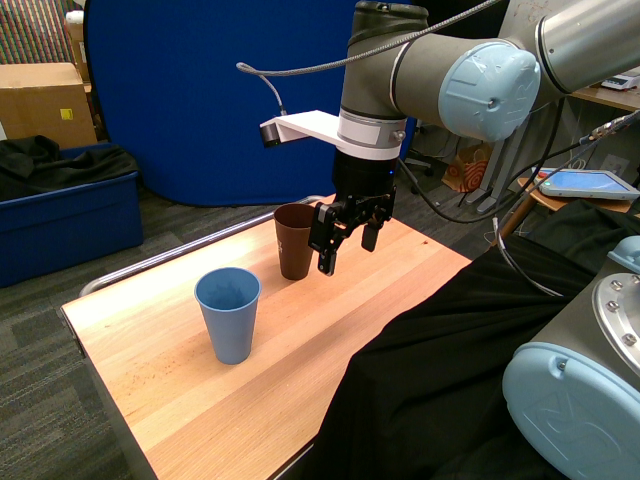

In [17]:
Image.fromarray(np.uint8(traj[0]['image'][0]))


In [ ]:
gt_actions.shape

(24, 7)

In [ ]:
# Load the images and actions from one episode from the Bridge dataset

def process_actions(path):  # gets actions
  fp = os.path.join(path, 'policy_out.pkl')
  act_list = pickle.load(open(fp, 'rb'))
  if isinstance(act_list[0], dict):
    act_list = [x['actions'] for x in act_list]
  return act_list

def image_name_to_idx(name):
  name = name.replace('im_', '').replace('.jpg', '')
  return int(name)

raw_data_path = Path('/content/drive/MyDrive/AUTOLab/Google-BAIR Commons/RT-1 on Bridge/robonetv2/toykitchen_fixed_cam/berkeley/toykitchen1/put_pot_in_sink/2021-06-08_20-18-29/raw/traj_group0/traj0')

image_root_path = raw_data_path / 'images0'

image_names = os.listdir(image_root_path)

image_names.sort(key=image_name_to_idx)

image_paths = [image_root_path / n for n in image_names]

images = [
    Image.open(open(image_path, 'rb')) for image_path in image_paths
]

gt_actions = np.array(process_actions(raw_data_path))

len(images), len(gt_actions)

(25, 24)

In [ ]:
print(images[0])

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480 at 0x7F3459F0E710>


In [3]:
# Load language model and embed the task string

embed = hub.load(
    'https://tfhub.dev/google/universal-sentence-encoder-large/5')

In [4]:
# task = 'put_pot_in_sink'
task = 'Take the tiger out of the red bowl and put it in the grey bowl.'
task = "Pick up the blue cup and put it into the brown cup. "

def normalize_task_name(task_name):

  replaced = task_name.replace('_', ' ').replace('1f', ' ').replace(
      '4f', ' ').replace('-', ' ').replace('50',
                                           ' ').replace('55',
                                                        ' ').replace('56', ' ')
  return replaced.lstrip(' ').rstrip(' ')


natural_language_embedding = embed([normalize_task_name(task)])[0]

2023-07-18 21:48:24.550683: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype string
	 [[{{node inputs}}]]


**PLEASE NOTE THAT IF THE ACTIONS IN THE DATASET WERE SCALED DURING TRAINING, YOU NEED TO DE-SCALE THE ACTION DURING INFERENCE. PLEASE CHAT WITH THE GOOGLER YOU ARE WORKING WITH FOR MORE DETAILS.**

In [8]:
# Run inference to obtain predicted actions for each image in the episode
# The input to the model is the image and natural_language_embedding.

resized_images = []
predicted_actions = []

policy_state = tfa_policy.get_initial_state(batch_size=1)

for image in images:

  image = tf.image.resize_with_pad(image, target_width=320, target_height=256)
  image = tf.cast(image, np.uint8)
  resized_images.append(image)

  observation['image'] = image.numpy()
  observation['natural_language_embedding'] = natural_language_embedding

  tfa_time_step = ts.transition(observation, reward=np.zeros(()))

  policy_step = tfa_policy.action(tfa_time_step, policy_state)
  action = policy_step.action
  policy_state = policy_step.state

  predicted_actions.append(action)

# Convert tf agents to bridge action format
def tfa_action_to_bridge_action(tfa_action):
#   return np.concatenate((tfa_action['world_vector'], tfa_action['rotation_delta'], tfa_action['gripper_closedness_action'], tfa_action['terminate_episode']))
  return np.concatenate((tfa_action['world_vector']/100, tfa_action['rotation_delta']/15, tfa_action['gripper_closedness_action'], tfa_action['terminate_episode']))

predicted_actions_bridge_format = np.array(list(map(tfa_action_to_bridge_action, predicted_actions)))

In [12]:
predicted_actions[20]

{'base_displacement_vertical_rotation': array([-0.00614786], dtype=float32),
 'gripper_closedness_action': array([-0.00195694], dtype=float32),
 'world_vector': array([0.08219171, 0.59099793, 1.412916  ], dtype=float32),
 'base_displacement_vector': array([-0.00195694, -0.00195694], dtype=float32),
 'rotation_delta': array([-0.24284327,  0.17521608,  0.15677226], dtype=float32),
 'terminate_episode': array([0, 1, 0], dtype=int32)}

In [22]:
gt_actions[20]

array([-0.00205714,  0.        ,  0.0156    ,  0.004     , -0.00266667,
        0.00247619,  0.        ,  0.        ])

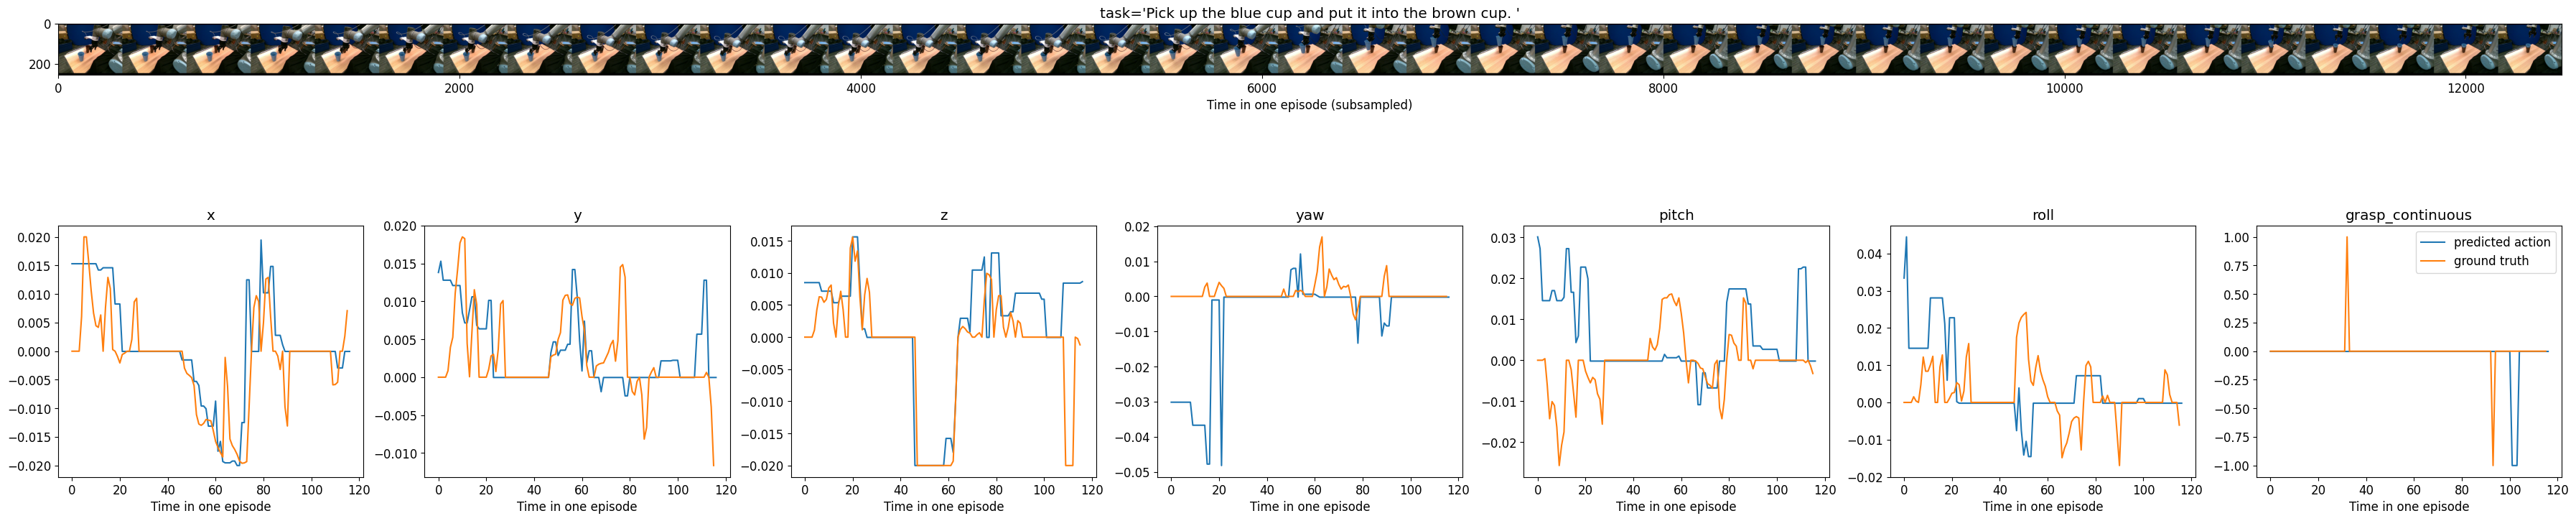

In [9]:
# Plot ground truth and predicted actions side by side
# The predicted actions seem shifted forward by one timestep, but that should be fine for now.

action_order = ['x', 'y', 'z', 'yaw', 'pitch', 'roll', 'grasp_continuous']

figure_layout = [
    ['image'] * len(action_order),
    action_order
]

plt.rcParams.update({'font.size': 12})

stacked = tf.concat(tf.unstack(resized_images[::3], axis=0), 1)

# fig, axs = plt.subplots(1, len(action_name_to_values_over_time))
fig, axs = plt.subplot_mosaic(figure_layout)
fig.set_size_inches([45, 10])

for action_dim, action_name in enumerate(action_order):
  axs[action_name].plot(predicted_actions_bridge_format[:, action_dim], label='predicted action')
  axs[action_name].plot(gt_actions[:, action_dim], label='ground truth')

  axs[action_name].set_title(action_name)
  axs[action_name].set_xlabel('Time in one episode')

axs['image'].imshow(stacked.numpy())
axs['image'].set_xlabel('Time in one episode (subsampled)')
axs['image'].set_title(f'{task=}')

plt.legend()


In [ ]:
len(images), len(gt_actions), len(predicted_actions_bridge_format)

(25, 24, 25)

In [21]:
predicted_actions_bridge_format[:, -3]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1.])